# CNN-RNN

In [1]:
import tensorflow.keras as keras

In [2]:
# Módulos necesarios. Asegurarse de poder importarlos.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from pylab import rcParams
from scipy import stats
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
import os as os
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from time import time
from tensorflow.keras.models import load_model

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [3]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)
tf.__version__

/usr/bin/python
3.6.8 (default, Aug 20 2019, 17:12:48) 
[GCC 8.3.0]
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


'1.14.0'

In [4]:
keras.__version__

'2.2.4-tf'

# 10-FOLD

In [5]:
subjects = ['01', '02', '03', '05', '08', '09', '10', '11', '13', '14', '16', '17']
global activities
activities = [9,10,11,12,13,19,20,21,24,25,31]

In [6]:
global size
size = 1078

In [7]:
from sklearn.model_selection import KFold
S = np.arange(0,size)
kf = KFold(n_splits=10)
kf.get_n_splits(S)

print(kf)  

S_train = []
S_test = []

for train_index, test_index in kf.split(S):
    S_train.append(S[train_index])
    S_test.append(S[test_index])

KFold(n_splits=10, random_state=None, shuffle=False)


In [8]:
def perf_measure(cm1):
    temp = 0
    TruePositive = np.diag(cm1)
    FalsePositive = []
    for i in range(len(activities)):
        FalsePositive.append(sum(cm1[:,i]) - cm1[i,i])
    FalseNegative = []
    for i in range(len(activities)):
        FalseNegative.append(sum(cm1[i,:]) - cm1[i,i])
    TrueNegative = []
    for i in range(len(activities)):
        temp = np.delete(cm1, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TrueNegative.append(sum(sum(temp)))
    
    return(TruePositive, FalsePositive, TrueNegative, FalseNegative)

In [9]:
def plot_confusion_matrix(cm, subject_test, classes,
                          cmap=plt.cm.Blues):
    
    a_kws = {"size": 20}
    c_kws = {'shrink':0.8,
             'ticks':[0,2,4,6,8,10]}
    
    plt.figure(figsize=(20, 20))
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes, square = True, robust = True, annot=True, cmap='YlOrBr', annot_kws=a_kws, cbar_kws=c_kws)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=20)
    #plt.title('CONFUSION MATRIX', fontsize=30)
    plt.ylabel('TRUE ACTIVITY', fontsize=25, fontstyle='italic')
    plt.xlabel('PREDICTION', fontsize=25, fontstyle='italic')
    
    locs, labels = plt.xticks()
    plt.xticks(locs, labels, rotation='horizontal')
    locs, labels = plt.yticks()
    plt.yticks(locs, labels, rotation='horizontal')
    plt.tick_params(labelsize=20)

    # Guardamos la imagen en formato vectorial
    plt.draw()
    plt.savefig('./01AUGFFT_RP_KFOLD_models/matriz_confusion_'+subject_test+'_RAWORIENTATION.svg', bbox_inches='tight',format='svg')
    plt.show()

In [10]:
# Ajustado a los datos
n_time_steps = 128
n_classes = 11 # Nº de clases (el 0 está eliminado)
n_channels = 1 # Nº de canales
n_columns = 40

# Podríamos variarlo
batch_size = 128 # Tamaño del batch
learning_rate = 1e-3 # Learning rate (por defecto es 0.001)
epochs = 100 # Épocas

##################################################################################################################################
#####################################################  K-FOLD 1  ################################################################
Test dataset: 
(108, 1, 128, 40) (108, 11)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Confusion matrix:
[[ 9  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  1  1  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  

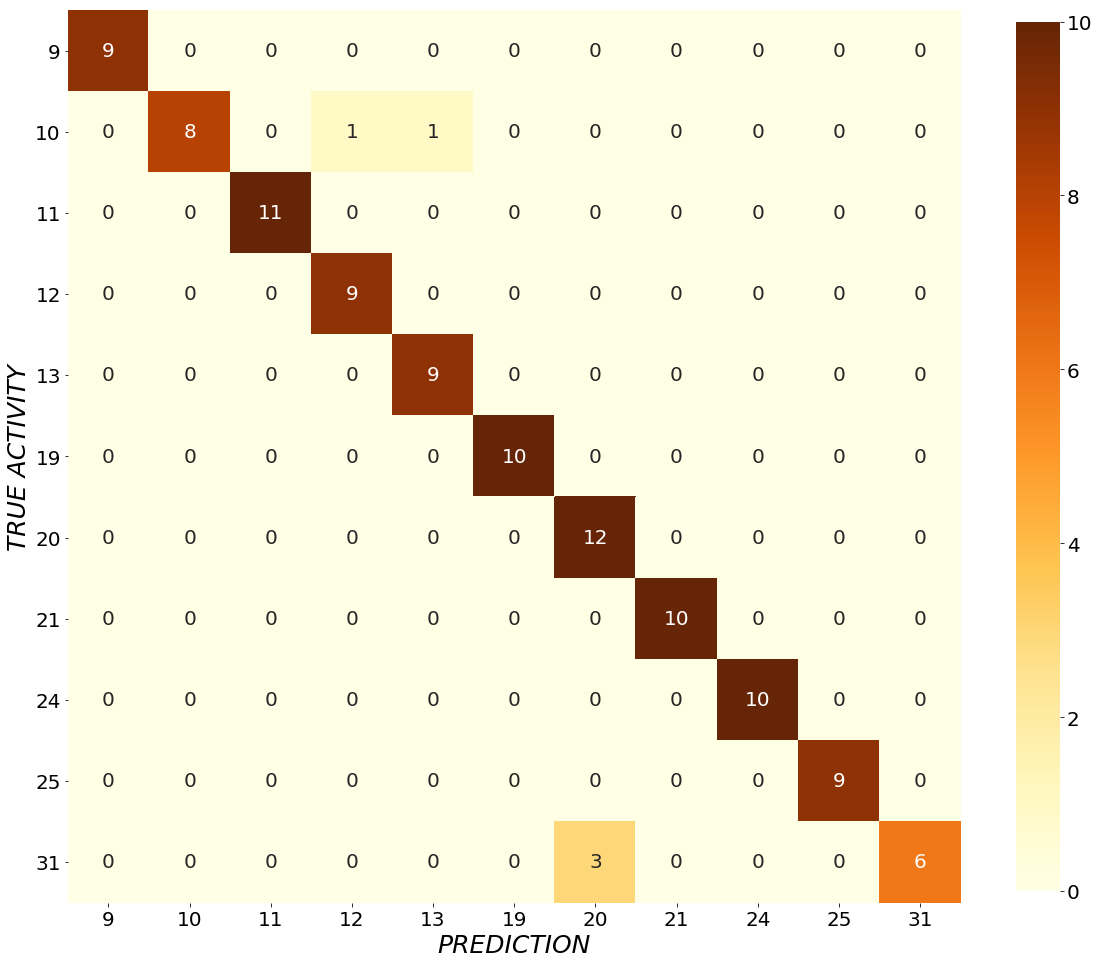



Total accuracy: 
0.9537037037037037


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     0.800     0.889        10
           2      1.000     1.000     1.000        11
           3      0.900     1.000     0.947         9
           4      0.900     1.000     0.947         9
           5      1.000     1.000     1.000        10
           6      0.800     1.000     0.889        12
           7      1.000     1.000     1.000        10
           8      1.000     1.000     1.000        10
           9      1.000     1.000     1.000         9
          10      1.000     0.667     0.800         9

    accuracy                          0.954       108
   macro avg      0.964     0.952     0.952       108
weighted avg      0.961     0.954     0.952       108



True Positive:  [ 9  8 11  9  9 10 12 10 10  9  6]
False Positive:  [0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 0]
True Negative:  [99,

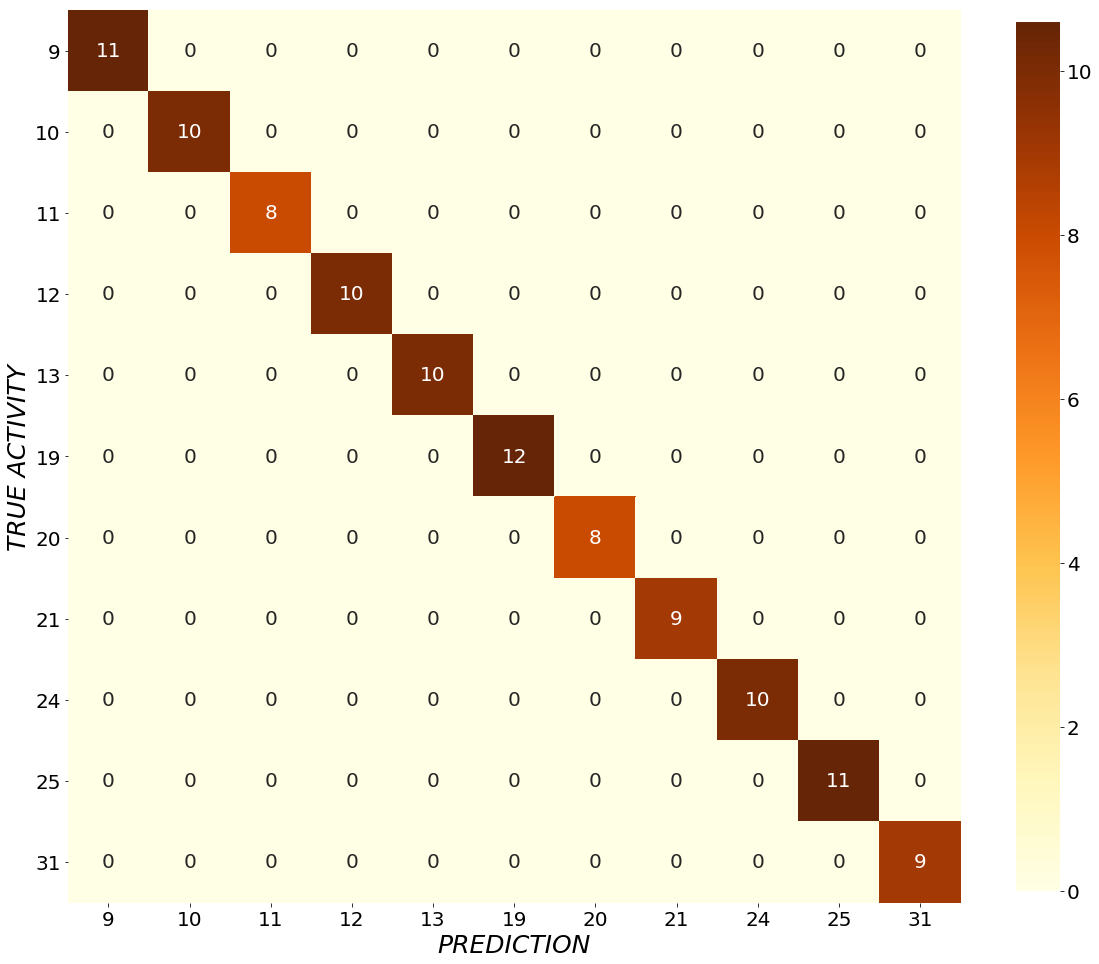



Total accuracy: 
1.0


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        11
           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000         8
           3      1.000     1.000     1.000        10
           4      1.000     1.000     1.000        10
           5      1.000     1.000     1.000        12
           6      1.000     1.000     1.000         8
           7      1.000     1.000     1.000         9
           8      1.000     1.000     1.000        10
           9      1.000     1.000     1.000        11
          10      1.000     1.000     1.000         9

    accuracy                          1.000       108
   macro avg      1.000     1.000     1.000       108
weighted avg      1.000     1.000     1.000       108



True Positive:  [11 10  8 10 10 12  8  9 10 11  9]
False Positive:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Negative:  [97, 98, 100, 98, 9

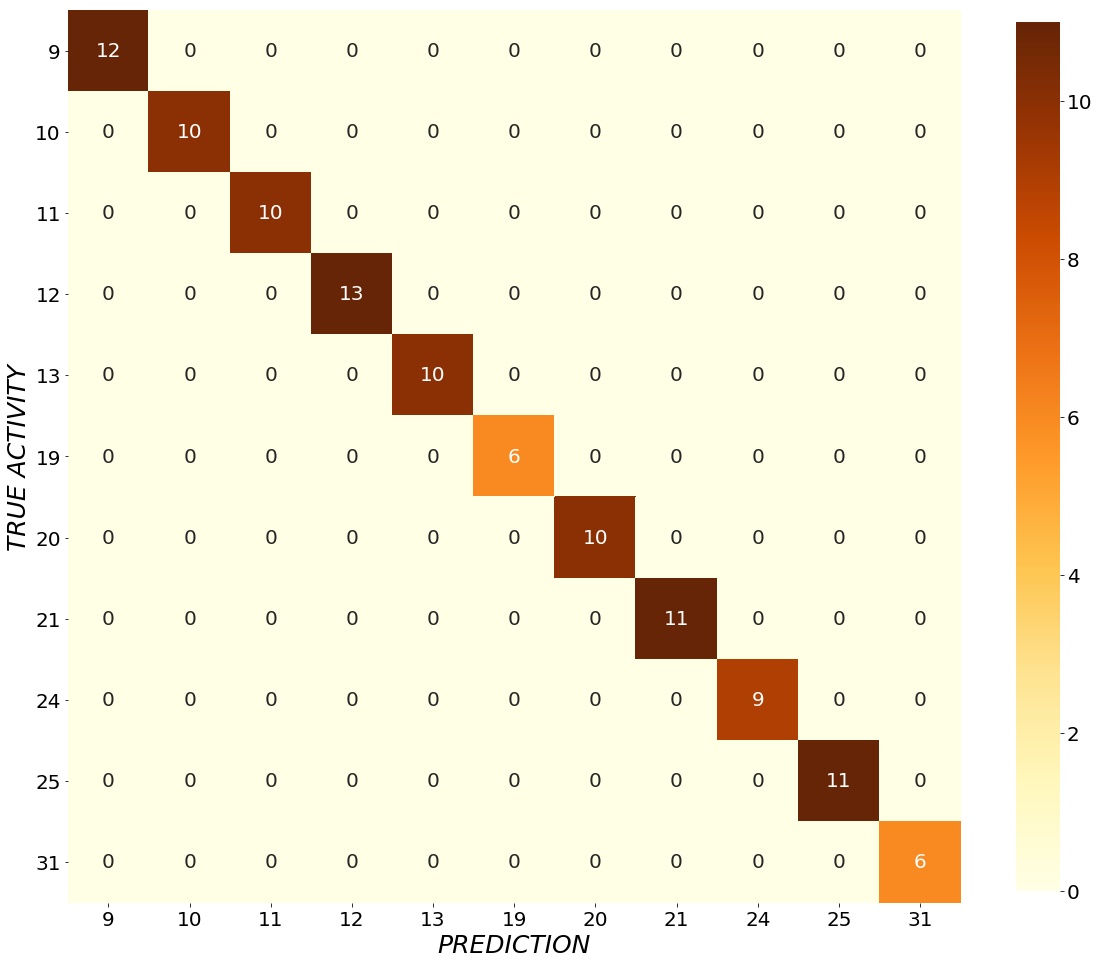



Total accuracy: 
1.0


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000        10
           3      1.000     1.000     1.000        13
           4      1.000     1.000     1.000        10
           5      1.000     1.000     1.000         6
           6      1.000     1.000     1.000        10
           7      1.000     1.000     1.000        11
           8      1.000     1.000     1.000         9
           9      1.000     1.000     1.000        11
          10      1.000     1.000     1.000         6

    accuracy                          1.000       108
   macro avg      1.000     1.000     1.000       108
weighted avg      1.000     1.000     1.000       108



True Positive:  [12 10 10 13 10  6 10 11  9 11  6]
False Positive:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Negative:  [96, 98, 98, 95, 98

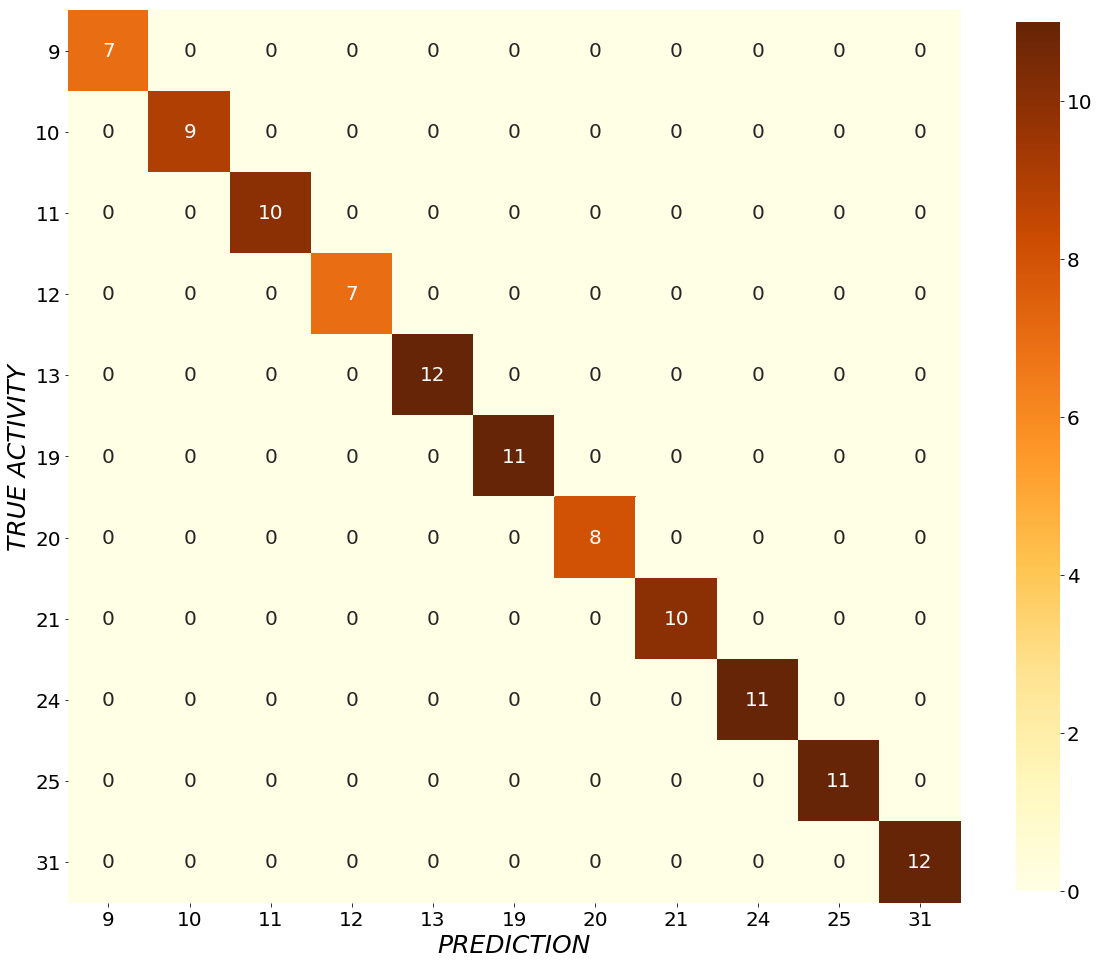



Total accuracy: 
1.0


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         7
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000        10
           3      1.000     1.000     1.000         7
           4      1.000     1.000     1.000        12
           5      1.000     1.000     1.000        11
           6      1.000     1.000     1.000         8
           7      1.000     1.000     1.000        10
           8      1.000     1.000     1.000        11
           9      1.000     1.000     1.000        11
          10      1.000     1.000     1.000        12

    accuracy                          1.000       108
   macro avg      1.000     1.000     1.000       108
weighted avg      1.000     1.000     1.000       108



True Positive:  [ 7  9 10  7 12 11  8 10 11 11 12]
False Positive:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Negative:  [101, 99, 98, 101, 

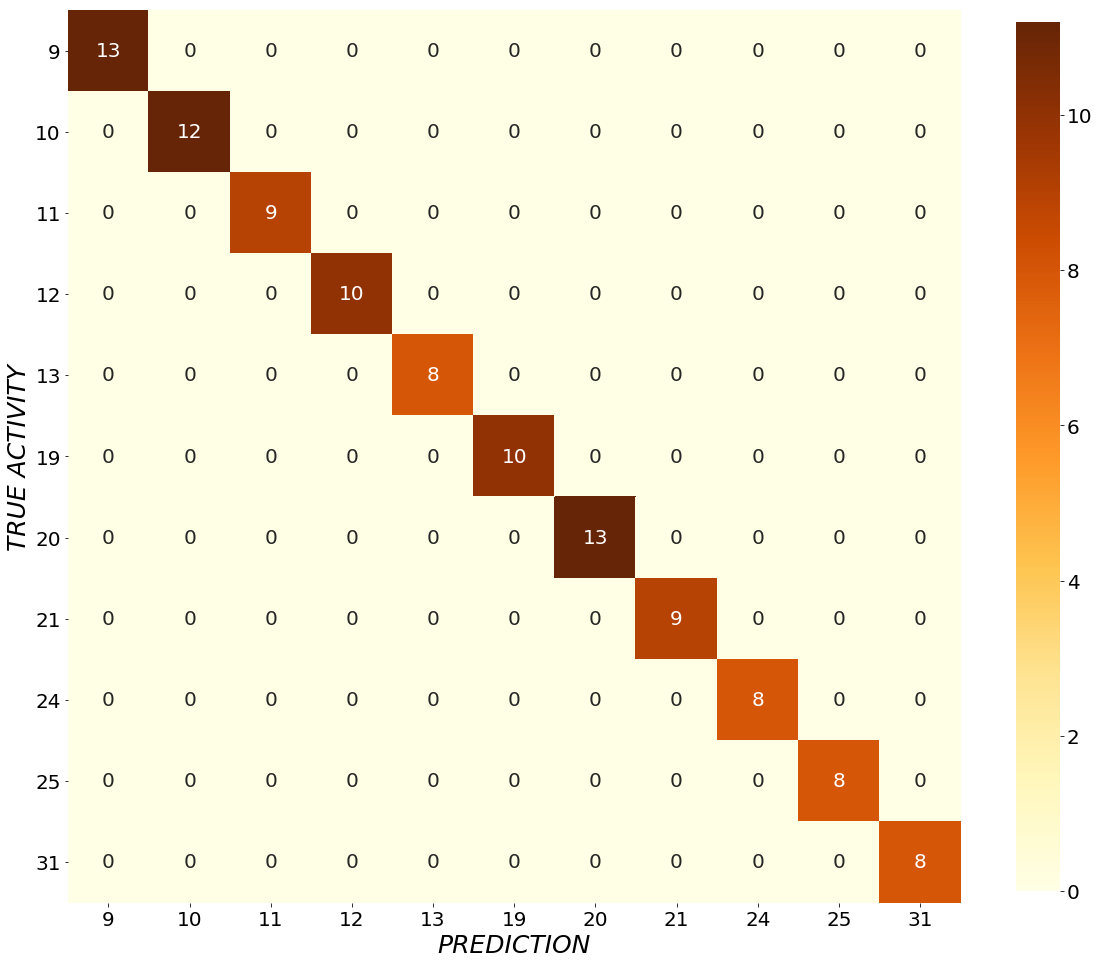



Total accuracy: 
1.0


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      1.000     1.000     1.000        12
           2      1.000     1.000     1.000         9
           3      1.000     1.000     1.000        10
           4      1.000     1.000     1.000         8
           5      1.000     1.000     1.000        10
           6      1.000     1.000     1.000        13
           7      1.000     1.000     1.000         9
           8      1.000     1.000     1.000         8
           9      1.000     1.000     1.000         8
          10      1.000     1.000     1.000         8

    accuracy                          1.000       108
   macro avg      1.000     1.000     1.000       108
weighted avg      1.000     1.000     1.000       108



True Positive:  [13 12  9 10  8 10 13  9  8  8  8]
False Positive:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Negative:  [95, 96, 99, 98, 10

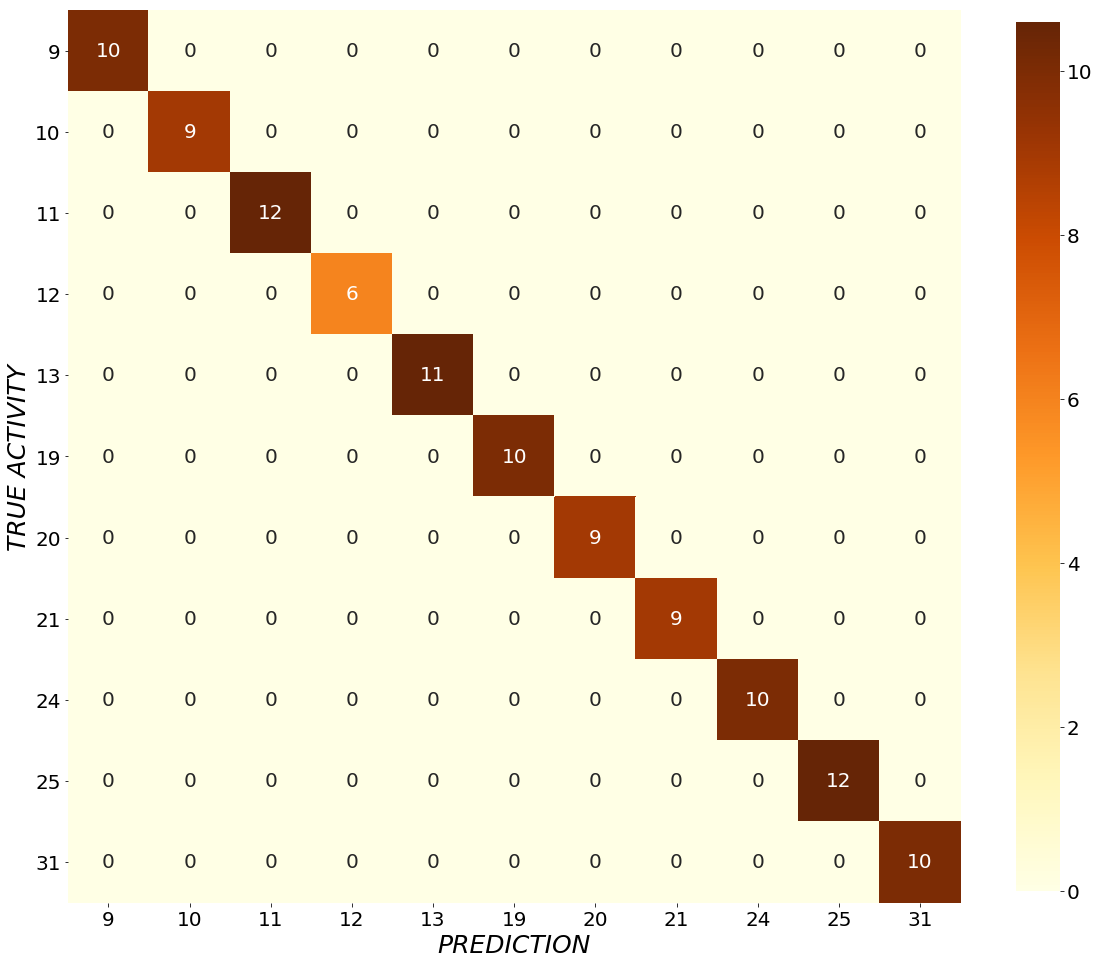



Total accuracy: 
1.0


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000        12
           3      1.000     1.000     1.000         6
           4      1.000     1.000     1.000        11
           5      1.000     1.000     1.000        10
           6      1.000     1.000     1.000         9
           7      1.000     1.000     1.000         9
           8      1.000     1.000     1.000        10
           9      1.000     1.000     1.000        12
          10      1.000     1.000     1.000        10

    accuracy                          1.000       108
   macro avg      1.000     1.000     1.000       108
weighted avg      1.000     1.000     1.000       108



True Positive:  [10  9 12  6 11 10  9  9 10 12 10]
False Positive:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Negative:  [98, 99, 96, 102, 9

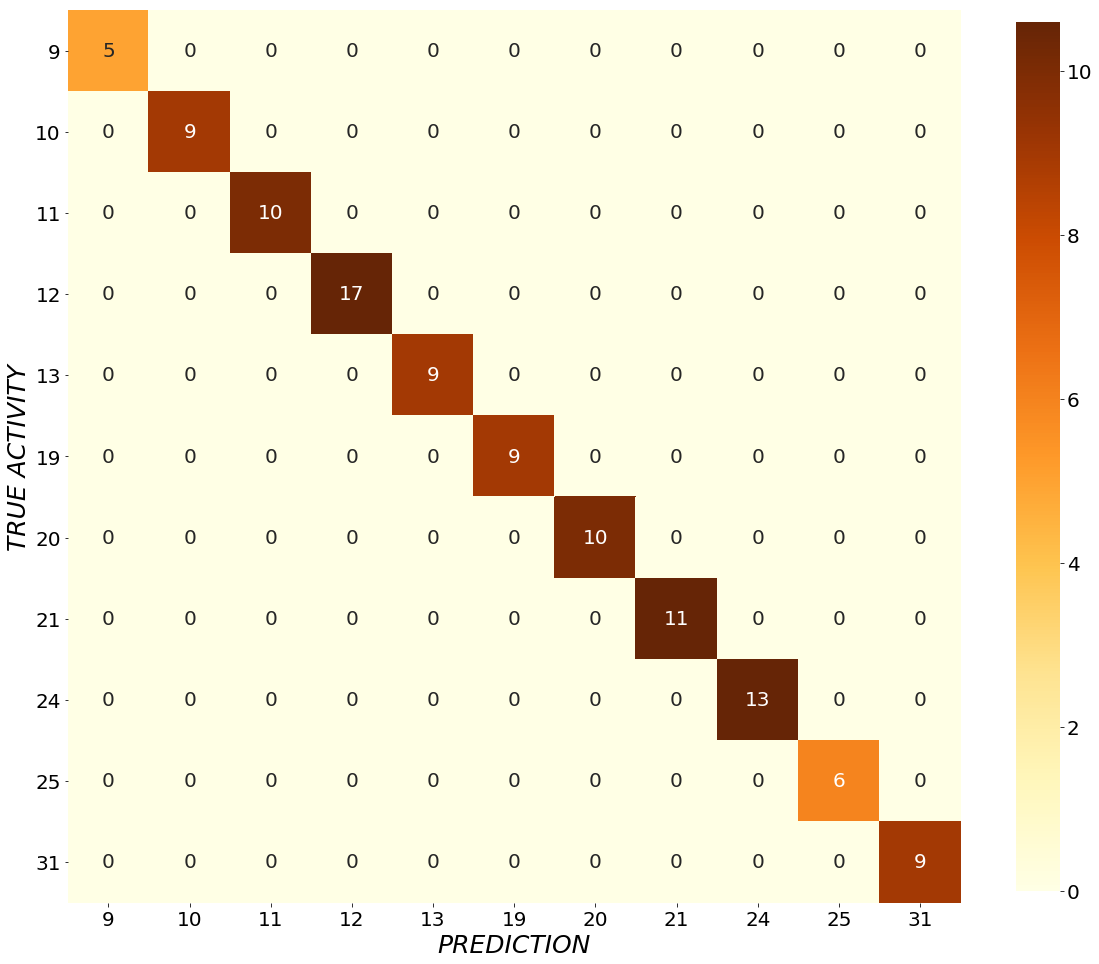



Total accuracy: 
1.0


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000        10
           3      1.000     1.000     1.000        17
           4      1.000     1.000     1.000         9
           5      1.000     1.000     1.000         9
           6      1.000     1.000     1.000        10
           7      1.000     1.000     1.000        11
           8      1.000     1.000     1.000        13
           9      1.000     1.000     1.000         6
          10      1.000     1.000     1.000         9

    accuracy                          1.000       108
   macro avg      1.000     1.000     1.000       108
weighted avg      1.000     1.000     1.000       108



True Positive:  [ 5  9 10 17  9  9 10 11 13  6  9]
False Positive:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Negative:  [103, 99, 98, 91, 9

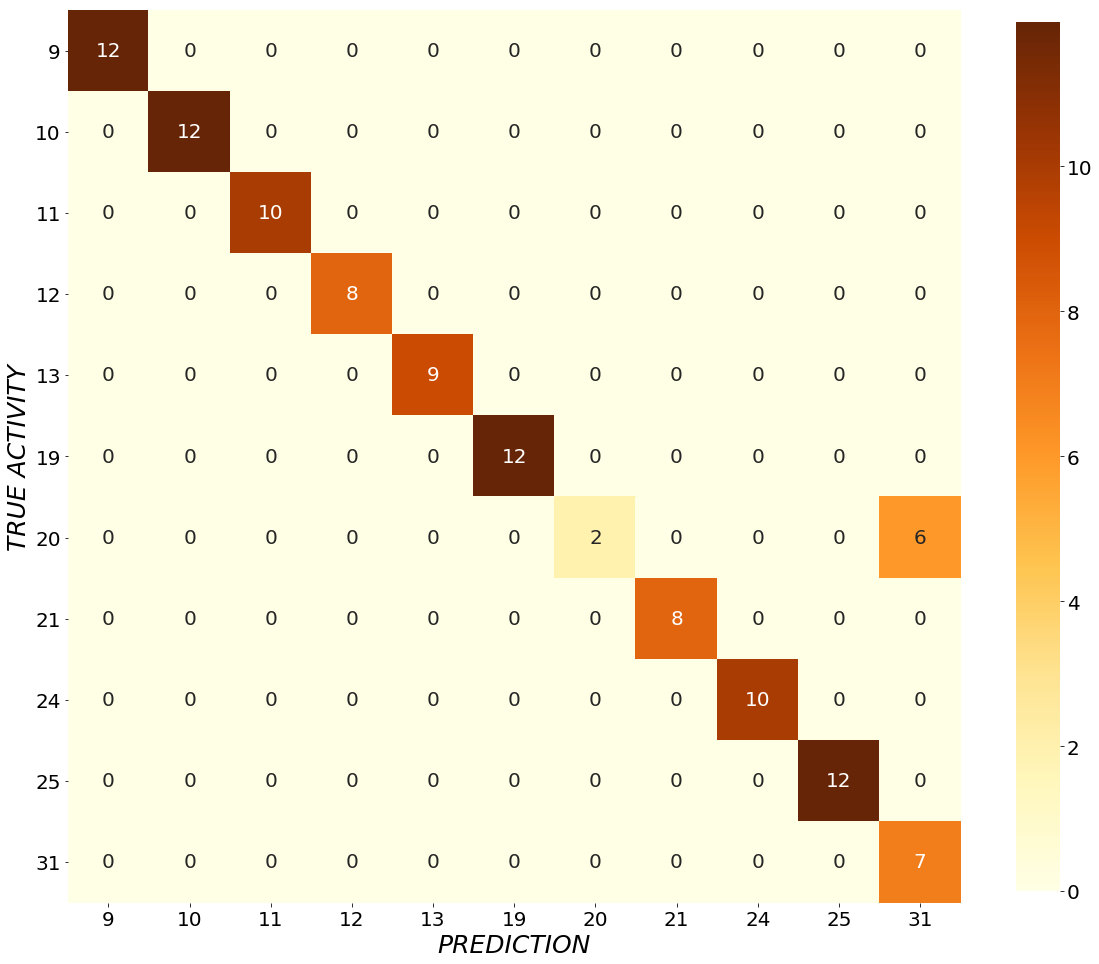



Total accuracy: 
0.9444444444444444


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      1.000     1.000     1.000        12
           2      1.000     1.000     1.000        10
           3      1.000     1.000     1.000         8
           4      1.000     1.000     1.000         9
           5      1.000     1.000     1.000        12
           6      1.000     0.250     0.400         8
           7      1.000     1.000     1.000         8
           8      1.000     1.000     1.000        10
           9      1.000     1.000     1.000        12
          10      0.538     1.000     0.700         7

    accuracy                          0.944       108
   macro avg      0.958     0.932     0.918       108
weighted avg      0.970     0.944     0.936       108



True Positive:  [12 12 10  8  9 12  2  8 10 12  7]
False Positive:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6]
True Negative:  [96,

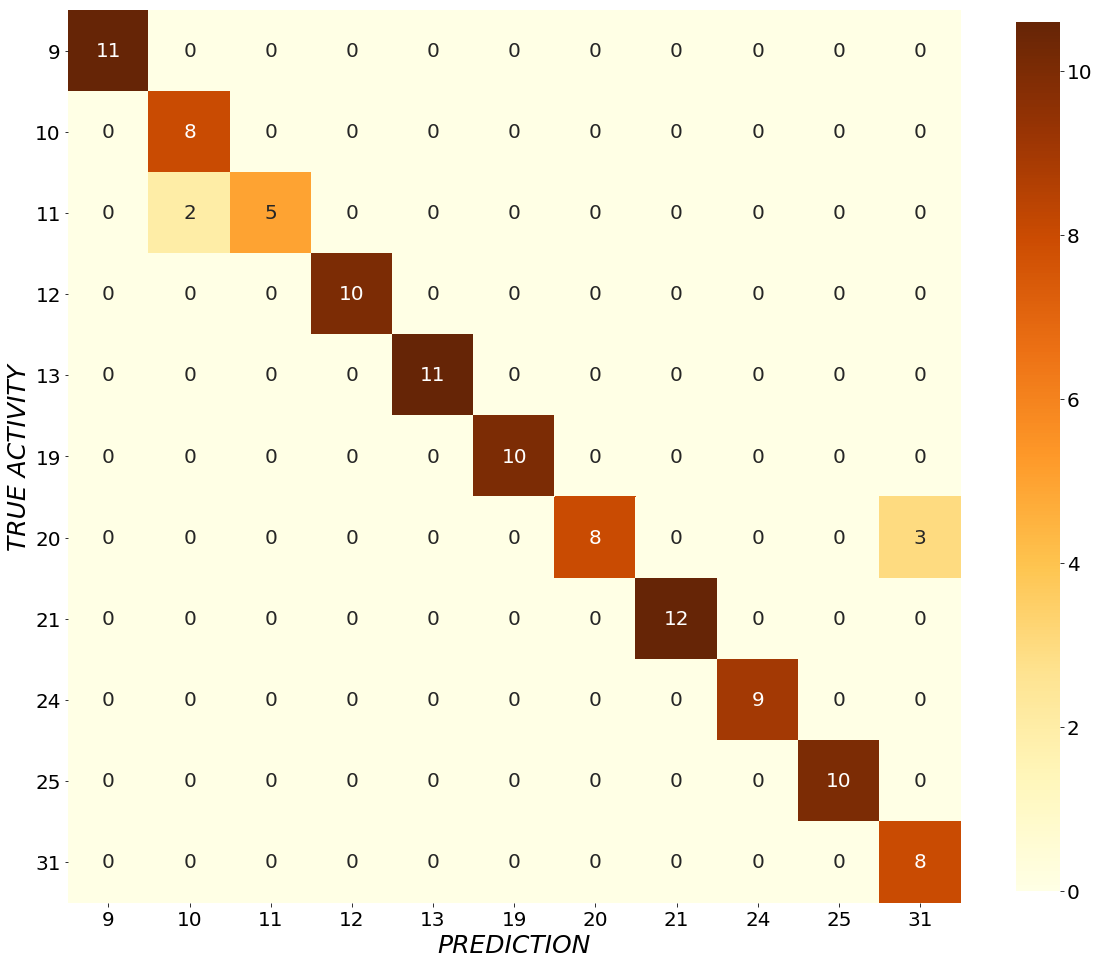



Total accuracy: 
0.9532710280373832


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        11
           1      0.800     1.000     0.889         8
           2      1.000     0.714     0.833         7
           3      1.000     1.000     1.000        10
           4      1.000     1.000     1.000        11
           5      1.000     1.000     1.000        10
           6      1.000     0.727     0.842        11
           7      1.000     1.000     1.000        12
           8      1.000     1.000     1.000         9
           9      1.000     1.000     1.000        10
          10      0.727     1.000     0.842         8

    accuracy                          0.953       107
   macro avg      0.957     0.949     0.946       107
weighted avg      0.965     0.953     0.953       107



True Positive:  [11  8  5 10 11 10  8 12  9 10  8]
False Positive:  [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3]
True Negative:  [96,

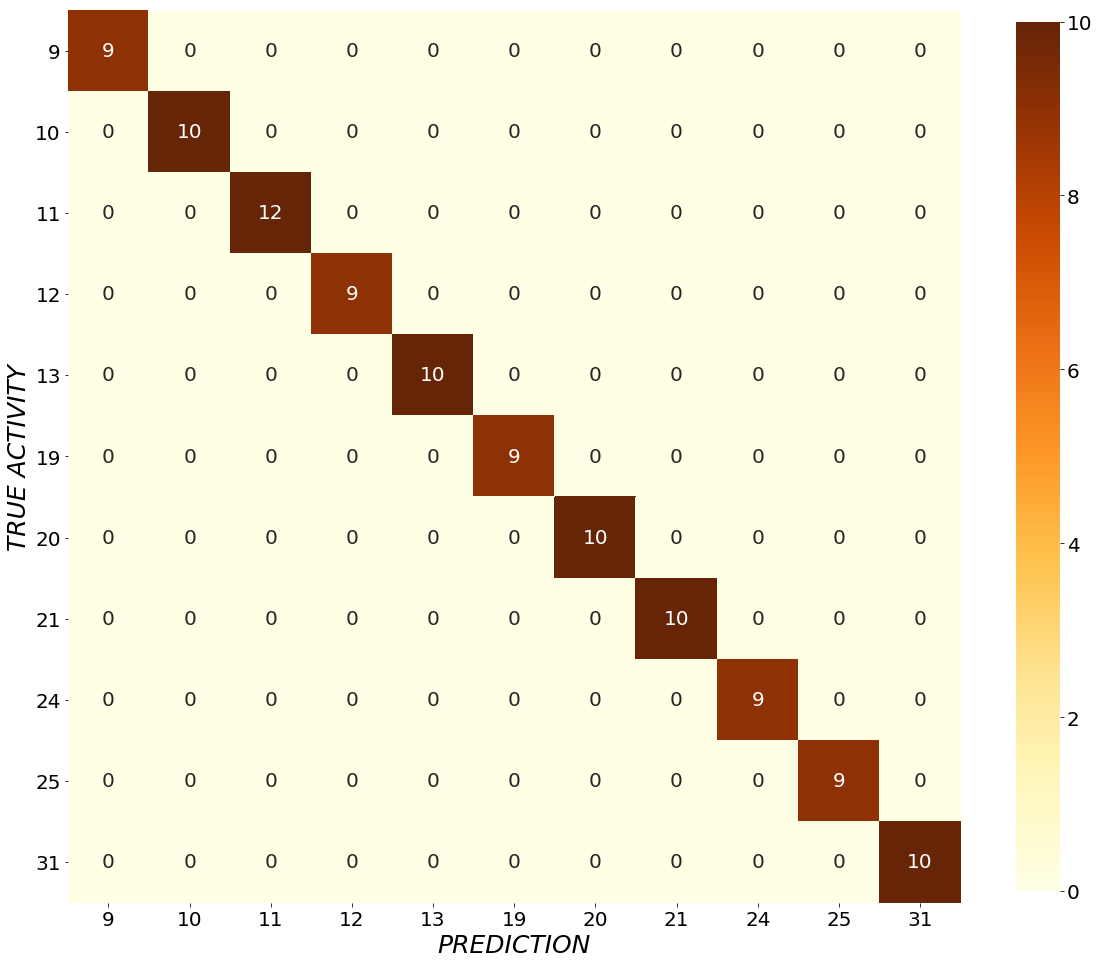



Total accuracy: 
1.0


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000        12
           3      1.000     1.000     1.000         9
           4      1.000     1.000     1.000        10
           5      1.000     1.000     1.000         9
           6      1.000     1.000     1.000        10
           7      1.000     1.000     1.000        10
           8      1.000     1.000     1.000         9
           9      1.000     1.000     1.000         9
          10      1.000     1.000     1.000        10

    accuracy                          1.000       107
   macro avg      1.000     1.000     1.000       107
weighted avg      1.000     1.000     1.000       107



True Positive:  [ 9 10 12  9 10  9 10 10  9  9 10]
False Positive:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True Negative:  [98, 97, 95, 98, 97

In [11]:
accuracies = np.zeros((10))
precision = np.zeros((10,11))
recall = np.zeros((10,11))
fScore = np.zeros((10,11))
support = np.zeros((10,11))
specifities = np.zeros((10,11))

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
measure = ['precision', 'recall', 'f1-score', 'support']

for i in range(10):
    if(i<10):
        kfold='0'+str(i)
    else:
        kfold=str(i)
    print('##################################################################################################################################')
    print('#####################################################  K-FOLD %d  ################################################################'%(i+1))
    
    subjects = ['01', '02', '03', '05', '08', '09', '10', '11', '13', '14', '16', '17']
    
    ##  GENERACIÓN DATASET
    tr_seg = np.concatenate((np.load('./def_raworientation/subject_'+subjects[0]+'_seg.npy'),np.load('./def_raworientation/subject_'+subjects[1]+'_seg.npy'),np.load('./def_raworientation/subject_'+subjects[2]+'_seg.npy'),np.load('./def_raworientation/subject_'+subjects[3]+'_seg.npy'),
                             np.load('./def_raworientation/subject_'+subjects[4]+'_seg.npy'),np.load('./def_raworientation/subject_'+subjects[5]+'_seg.npy'),np.load('./def_raworientation/subject_'+subjects[6]+'_seg.npy'),np.load('./def_raworientation/subject_'+subjects[7]+'_seg.npy'),
                             np.load('./def_raworientation/subject_'+subjects[8]+'_seg.npy'),np.load('./def_raworientation/subject_'+subjects[9]+'_seg.npy'),np.load('./def_raworientation/subject_'+subjects[10]+'_seg.npy')))

    tr_lab = np.concatenate((np.load('./def_raworientation/subject_'+subjects[0]+'_lab.npy'),np.load('./def_raworientation/subject_'+subjects[1]+'_lab.npy'),np.load('./def_raworientation/subject_'+subjects[2]+'_lab.npy'),np.load('./def_raworientation/subject_'+subjects[3]+'_lab.npy'),
                             np.load('./def_raworientation/subject_'+subjects[4]+'_lab.npy'),np.load('./def_raworientation/subject_'+subjects[5]+'_lab.npy'),np.load('./def_raworientation/subject_'+subjects[6]+'_lab.npy'),np.load('./def_raworientation/subject_'+subjects[7]+'_lab.npy'),
                             np.load('./def_raworientation/subject_'+subjects[8]+'_lab.npy'),np.load('./def_raworientation/subject_'+subjects[9]+'_lab.npy'),np.load('./def_raworientation/subject_'+subjects[10]+'_lab.npy')))
    
    limit = 40
    tr_seg = tr_seg[:,:,:,:limit]
    ####################################################################################################################
    ## SHUFFLE DE DATOS
    np.random.seed(235)
    tr_seg = np.reshape(tr_seg[np.random.shuffle(np.arange(0,tr_seg.shape[0]))], (size,1,128,limit))
    tr_lab = np.reshape(tr_lab[np.random.shuffle(np.arange(0,tr_seg.shape[0]))], (size,11))
    
    ts_seg = tr_seg[S_test[i]]
    ts_lab = tr_lab[S_test[i]]
    
    del tr_seg, tr_lab
    
    print('Test dataset: ')
    print(ts_seg.shape, ts_lab.shape)
    ####################################################################################################################
    ## RED
    model = load_model('./01AUGFFT_RP_KFOLD_models/CNN_'+kfold+'.h5')
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=learning_rate),metrics=['categorical_accuracy'])
    ####################################################################################################################
    ## TEST
    predictions = model.predict(ts_seg, batch_size = batch_size, verbose = 0)
    
    y_pred = np.argmax(predictions,axis=-1)
    y_pred = np.expand_dims(y_pred,axis=-1)
    
    y_true = np.argmax(ts_lab,axis=-1)
    y_true = np.expand_dims(y_true,axis=-1)
    
    y_true_flat = np.ndarray.flatten(y_true)
    y_pred_flat = np.ndarray.flatten(y_pred)
    ####################################################################################################################
    ## METRICS        
    # CONFUSION MATRIX
    print('\n')
    print('Confusion matrix:')
    cm = metrics.confusion_matrix(y_true, y_pred)
    print(cm)
    plot_confusion_matrix(cm, kfold, classes=activities)
    
    # ACCURACY
    print('\n')
    acc = metrics.accuracy_score(y_true_flat,y_pred_flat)
    accuracies[i] = acc
    print('Total accuracy: ')
    print(acc)
    
    # CLASSIFICATION REPORT
    print('\n')
    print('Classification report:')
    reportString = metrics.classification_report(y_true_flat, y_pred_flat, digits=3)
    print(reportString)
    report = metrics.classification_report(y_true_flat, y_pred_flat, digits=3, output_dict=True)
    
    for j in range(len(classes)):
        precision[i,j] = report[classes[j]][measure[0]]
        recall[i,j] = report[classes[j]][measure[1]]
        fScore[i,j] = report[classes[j]][measure[2]]
        support[i,j] = report[classes[j]][measure[3]]
    
    
    # SPECIFITY
    print('\n')
    tp, fp, tn, fn = perf_measure(cm)
    print('True Positive: ', str(tp))
    print('False Positive: ', str(fp))
    print('True Negative: ', str(tn))
    print('False Negative: ', str(fn))
    print('\n')
    specifity = []
    print('Specifity: ')
    for j in range(len(activities)):
        specifity.append(tn[j]/(tn[j]+fp[j]))
        print('%d'%(j)+'\t'+ str(specifity[j]))
    
    for j in range(len(specifity)):
        specifities[i,j] = specifity[j]
    
    fo = open('./01AUGFFT_RP_KFOLD_models/metrics_RAW_ORIENTATION_'+kfold+'.txt', "w")
    fo.seek(0,2)
    fo.write('Accuracy: ' + str(acc))
    fo.write('\n')
    fo.write('Confusion matrix: ')
    fo.write('\n')
    fo.write(str(cm))
    fo.write('\n')
    fo.write('Specifity:')
    fo.write(str(specifity))
    fo.write('\n')
    fo.write('Report: ')
    fo.write('\n')
    fo.write(reportString)
    fo.close()
    
    
    del kfold, ts_seg, ts_lab, model, y_pred, y_true, predictions, y_true_flat, y_pred_flat, reportString, specifity, cm, report
    

# TOTAL METRICS

In [12]:
print('Total accuracy: ' + str(sum(accuracies)/10))

prec = np.sum(precision,axis=0)/10
print('Precision per class: ')
for j in range(11):
    print('%d'%(j)+'\t'+str(prec[j]))
print('Total precision: ' + str(sum(prec)/11))

rec = np.sum(recall,axis=0)/10
print('Recall per class: ')
for j in range(11):
    print('%d'%(j)+'\t'+str(rec[j]))
print('Total recall: ' + str(sum(rec)/11))

fS = np.sum(fScore,axis=0)/10
print('F1-score per class: ')
for j in range(11):
    print('%d'%(j)+'\t'+str(fS[j]))
print('Total F1-score: ' + str(sum(fS)/11))

spec = np.sum(specifities,axis=0)/10
print('Specifities per class: ')
for j in range(11):
    print('%d'%(j)+'\t'+str(spec[j]))
print('Total specifities: ' + str(sum(spec)/11))

Total accuracy: 0.9851419176185532
Precision per class: 
0	1.0
1	0.9800000000000001
2	1.0
3	0.99
4	0.99
5	1.0
6	0.9800000000000001
7	1.0
8	1.0
9	1.0
10	0.9265734265734265
Total precision: 0.9878703115066753
Recall per class: 
0	1.0
1	0.9800000000000001
2	0.9714285714285713
3	1.0
4	1.0
5	1.0
6	0.8977272727272727
7	1.0
8	1.0
9	1.0
10	0.9666666666666666
Total recall: 0.9832565918929554
F1-score per class: 
0	1.0
1	0.9777777777777779
2	0.9833333333333334
3	0.9947368421052631
4	0.9947368421052631
5	1.0
6	0.9130994152046785
7	1.0
8	1.0
9	1.0
10	0.9342105263157896
Total F1-score: 0.9816267942583732
Specifities per class: 
0	1.0
1	0.997979797979798
2	1.0
3	0.998989898989899
4	0.998989898989899
5	1.0
6	0.996875
7	1.0
8	1.0
9	1.0
10	0.9910291029102911
Total specifities: 0.9985330635336261
